# Machine Learning Example Notebook

This notebook demonstrates basic ML operations with numpy, torch, and transformers.

In [3]:
# Import necessary libraries
import numpy as np
import torch
import matplotlib.pyplot as plt
from transformers import BertConfig, BertModel

# Import from our project
from src.test_project.data import create_random_data, numpy_to_torch, get_device
from src.test_project.model import SimpleNN, create_small_transformer, apply_model
from src.test_project.train import plot_matrix, plot_line_chart, plot_bar_chart, create_subplots

# Set up matplotlib for inline display
%matplotlib inline
plt.style.use('ggplot')

## 1. Numpy Calculations

Let's perform some basic calculations using numpy.

In [4]:
# Create random data
X, y = create_random_data(n_samples=100, n_features=10)
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Show a sample
print(f"Sample features:{X[:5, :5]}")
print(f"Sample labels: {y[:10]}")

# Matrix operations
eigenvalues, eigenvectors = np.linalg.eig(X[:5, :5])
print(f"Eigenvalues:{eigenvalues}")

# Statistical operations
print(f"Mean of each column: {np.mean(X, axis=0)[:5]}...")
print(f"Standard deviation of each column: {np.std(X, axis=0)[:5]}...")

# Class distribution
unique, counts = np.unique(y, return_counts=True)
print(f"Class distribution: {dict(zip(unique, counts))}")

Features shape: (100, 10)
Labels shape: (100,)
Sample features:[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
 [-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819 -0.54438272]
 [-0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491]
 [ 0.73846658  0.17136828 -0.11564828 -0.3011037  -1.47852199]]
Sample labels: [1 0 0 0 0 1 0 0 1 0]
Eigenvalues:[ 1.12355458+0.j         -1.16542233+1.11872495j -1.16542233-1.11872495j
 -0.61521511+1.8345209j  -0.61521511-1.8345209j ]
Mean of each column: [ 0.0036178   0.00257761 -0.04851093  0.10897352  0.07949852]...
Standard deviation of each column: [0.88981454 1.04210866 1.02121872 1.01145451 1.03748527]...
Class distribution: {np.int64(0): np.int64(55), np.int64(1): np.int64(45)}


## 2. PyTorch Calculations

Now let's perform similar calculations using PyTorch.

In [5]:
# Convert numpy arrays to PyTorch tensors
X_tensor = numpy_to_torch(X)
y_tensor = numpy_to_torch(y, dtype=torch.long)

print(f"X tensor shape: {X_tensor.shape}")
print(f"y tensor shape: {y_tensor.shape}")

# Move to GPU if available
device = get_device()
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)
print(f"Using device: {device}")

# Create a simple neural network
model = SimpleNN(input_dim=X.shape[1], hidden_dim=20, output_dim=2)
model = model.to(device)

# Forward pass
outputs = model(X_tensor)
print(f"Model output shape: {outputs.shape}")
print(f"First few outputs:{outputs[:5]}")

X tensor shape: torch.Size([100, 10])
y tensor shape: torch.Size([100])
Using device: cpu
Model output shape: torch.Size([100, 2])
First few outputs:tensor([[-0.0721, -0.2430],
        [-0.2166,  0.2847],
        [-0.1331,  0.3198],
        [ 0.3735, -0.6398],
        [-0.1849,  0.3008]], grad_fn=<SliceBackward0>)


## 3. Visualization with Matplotlib

Let's create some visualizations of our data.

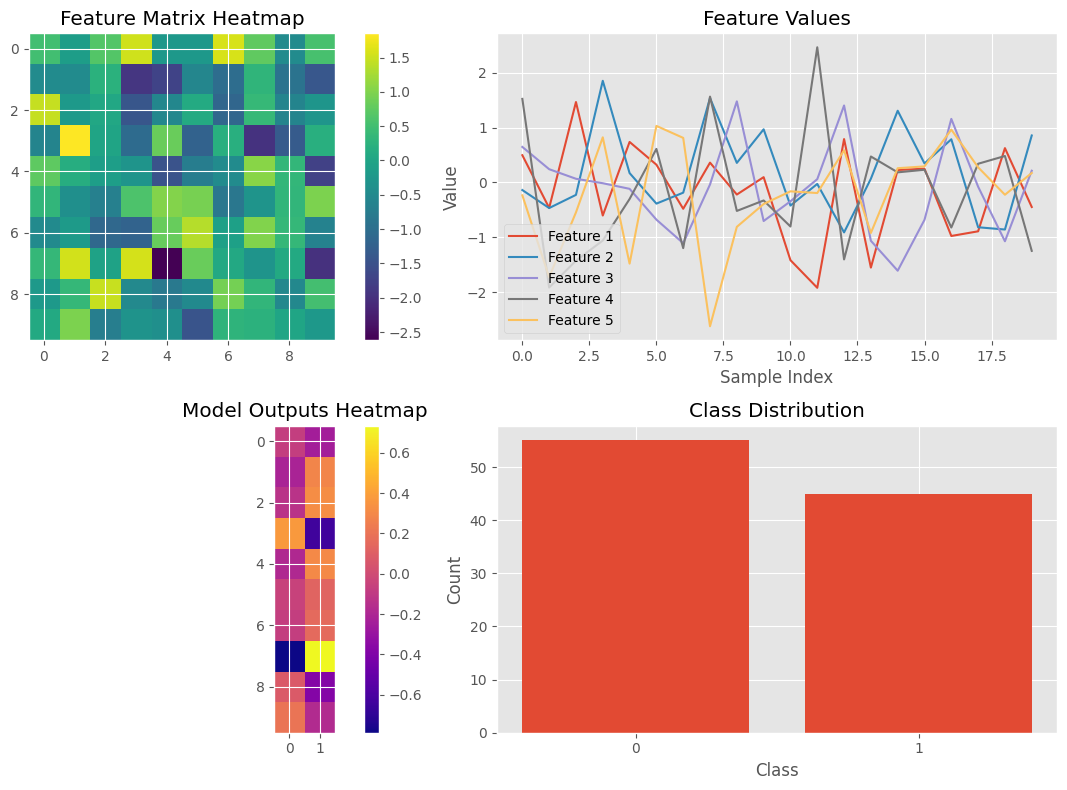

In [6]:
# Create a figure with subplots
fig, axes = create_subplots(2, 2, figsize=(12, 8))

# Plot 1: Heatmap of numpy matrix
plot_matrix(X[:10, :10], title='Feature Matrix Heatmap', ax=axes[0, 0])

# Plot 2: Line plot of numpy data
data_series = [X[:20, i] for i in range(5)]  # First 5 features, first 20 samples
labels = [f'Feature {i+1}' for i in range(5)]
plot_line_chart(data_series, labels, title='Feature Values', 
                xlabel='Sample Index', ylabel='Value', ax=axes[0, 1])

# Plot 3: Heatmap of model outputs
plot_matrix(outputs[:10].detach().cpu().numpy(), 
            title='Model Outputs Heatmap', cmap='plasma', ax=axes[1, 0])

# Plot 4: Bar chart of class distribution
plot_bar_chart(counts, labels=unique, title='Class Distribution',
               xlabel='Class', ylabel='Count', ax=axes[1, 1])

plt.tight_layout()

## 4. Loading a Transformers Model from Custom Config

Now let's create a small untrained BERT model from a custom configuration.

In [7]:
# Create a small transformer model
model, config = create_small_transformer(
    vocab_size=1000,          # Reduced vocabulary size
    hidden_size=64,           # Smaller hidden size
    num_layers=2,             # Fewer layers
    num_heads=2               # Fewer attention heads
)

# Print the configuration
print("Custom BERT Configuration:")
print(config)

Custom BERT Configuration:
BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 64,
  "initializer_range": 0.02,
  "intermediate_size": 256,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 128,
  "model_type": "bert",
  "num_attention_heads": 2,
  "num_hidden_layers": 2,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.55.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 1000
}



In [8]:
# Print model summary
print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")

# List some of the model's modules
for name, module in list(model.named_modules())[:10]:  # Show only first 10 modules
    print(f"{name}: {module.__class__.__name__}")

Model parameters: 176,576
: BertModel
embeddings: BertEmbeddings
embeddings.word_embeddings: Embedding
embeddings.position_embeddings: Embedding
embeddings.token_type_embeddings: Embedding
embeddings.LayerNorm: LayerNorm
embeddings.dropout: Dropout
encoder: BertEncoder
encoder.layer: ModuleList
encoder.layer.0: BertLayer


In [9]:
# Create a sample input
batch_size = 2
seq_length = 10
input_ids = torch.randint(0, config.vocab_size, (batch_size, seq_length))
attention_mask = torch.ones(batch_size, seq_length)

print(f"Input IDs shape: {input_ids.shape}")
print(f"Attention mask shape: {attention_mask.shape}")

Input IDs shape: torch.Size([2, 10])
Attention mask shape: torch.Size([2, 10])


In [10]:
# Run the model
model.eval()
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)

# Examine the outputs
last_hidden_state = outputs.last_hidden_state
pooler_output = outputs.pooler_output

print(f"Last hidden state shape: {last_hidden_state.shape}")
print(f"Pooler output shape: {pooler_output.shape}")

Last hidden state shape: torch.Size([2, 10, 64])
Pooler output shape: torch.Size([2, 64])


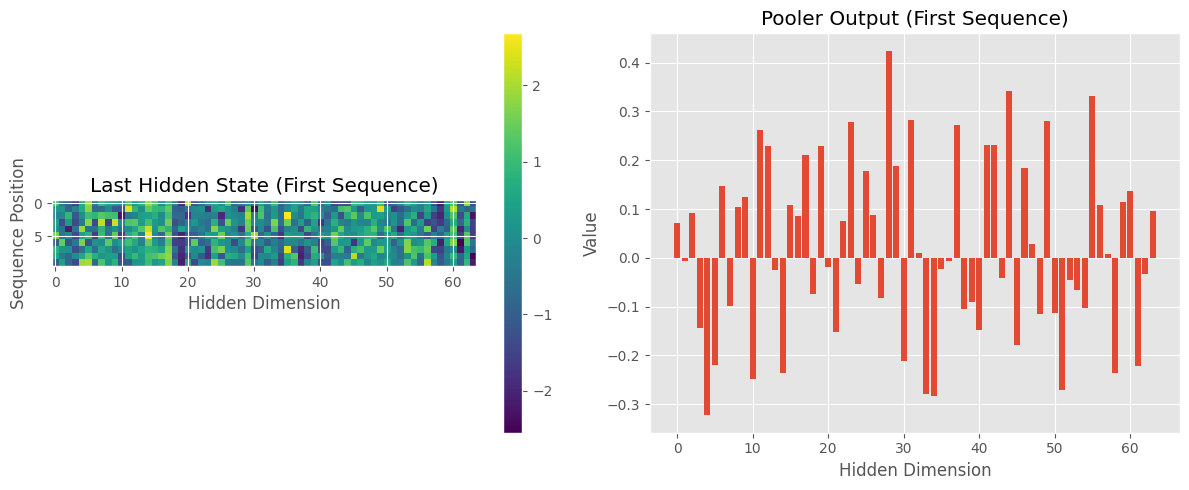

In [11]:
# Visualize the embeddings
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the last hidden state for the first sequence
plot_matrix(last_hidden_state[0], title='Last Hidden State (First Sequence)',
            ax=axes[0])
axes[0].set_xlabel('Hidden Dimension')
axes[0].set_ylabel('Sequence Position')

# Plot the pooler output
plot_bar_chart(pooler_output[0], title='Pooler Output (First Sequence)',
               xlabel='Hidden Dimension', ylabel='Value', ax=axes[1])

plt.tight_layout()

## Conclusion

In this notebook, we've demonstrated:

1. Basic calculations with NumPy
2. Similar operations with PyTorch
3. Data visualization with Matplotlib
4. Creating and using a small untrained transformer model from a custom configuration

These examples show how to use the core libraries included in this ML project template.